# Эксперимент №1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
top_stats = pd.read_csv('https://raw.githubusercontent.com/mishenkoil/os-lite-2020/master/lab5/top_stats.csv')
top_stats.head()

,Time,Mem1 %,Mem2 %,Total Memory,Total swap,Free Memory,Free Swap,Used Memory,Used Swap
0,21:41:08,2.2,2.2,8060820,2097148,4623672,289632,2222580,1807516
1,21:41:23,12.9,13.0,8060820,2097148,2886804,289636,3958340,1807512
2,21:42:28,37.2,37.8,8060820,2097148,107864,0,7483124,2097148
3,21:42:39,38.8,0.0,8060820,2097148,107352,0,7634084,2097148
4,21:43:09,60.8,0.0,8060820,2097148,1344356,3188,2093960,2093960


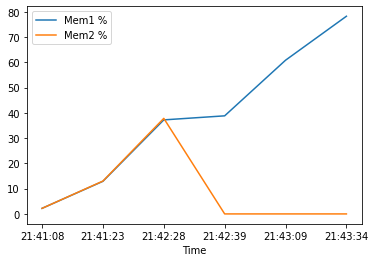

In [3]:
mem_per_proc = top_stats[['Time', 'Mem1 %', 'Mem2 %']]
mem_per_proc.set_index('Time', inplace=True)
mem_per_proc.plot()
plt.show()

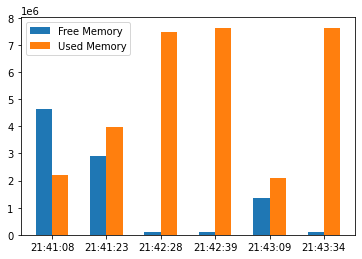

In [4]:
x_ax = top_stats['Time']

fmem = top_stats['Free Memory']
umem = top_stats['Used Memory']

width = 0.3

x = np.arange(len(x_ax))

fig, ax = plt.subplots()

ax.bar(x - width/2, fmem, width, label='Free Memory')
ax.bar(x + width/2, umem, width, label='Used Memory')

ax.set_xticks(x)
ax.set_xticklabels(x_ax)
ax.legend()

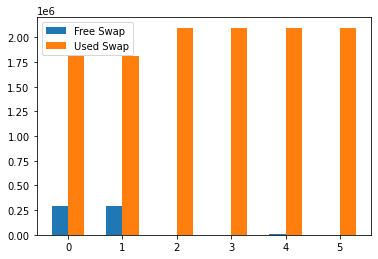

In [5]:
fswap = top_stats['Free Swap']
uswap = top_stats['Used Swap']

fig, ax = plt.subplots()

ax.bar(x - width/2, fswap, width, label='Free Swap')
ax.bar(x + width/2, uswap, width, label='Used Swap')

ax.legend()

**Запись в системном журнале при запуске mem.bash:** <br>
[ 7317.918501] Out of memory: Kill process 9671 (mem.bash) score 558 or sacrifice child <br>
[ 7317.918507] Killed process 9671 (mem.bash) total-vm:5679284kB, anon-rss:5665348kB, file-rss:0kB, shmem-rss:0kB <br>
[ 7318.153405] oom_reaper: reaped process 9671 (mem.bash), now anon-rss:0kB, file-rss:0kB, shmem-rss:0kB <br>
**Последнее значение из report.log:** <br>
72000010

**Запись в системном журнале при запуске двух процессов:** <br>
[ 8459.390604] Out of memory: Kill process 10148 (mem2.bash) score 313 or sacrifice child <br>
[ 8459.390609] Killed process 10148 (mem2.bash) total-vm:3192800kB, anon-rss:3178896kB, file-rss:0kB, shmem-rss:0kB <br>
[ 8459.544945] oom_reaper: reaped process 10148 (mem2.bash), now anon-rss:0kB, file-rss:0kB, shmem-rss:0kB <br>
[ 8517.123155] [10147]  1000 10147  1579574  1576126 12701696        0             0 mem.bash <br>
[ 8517.123157] Out of memory: Kill process 10147 (mem.bash) score 621 or sacrifice child <br>
[ 8517.123163] Killed process 10147 (mem.bash) total-vm:6318296kB, anon-rss:6304504kB, file-rss:0kB, shmem-rss:0kB <br>
[ 8517.456502] oom_reaper: reaped process 10147 (mem.bash), now anon-rss:0kB, file-rss:0kB, shmem-rss:0kB <br>
**Последнее значение из report.log:** <br>
80000010 <br>
**Последнее значение из report2.log:** <br>
40000010


#Вывод:
* Если запустить параллельно 2 процесса, которые расходуют всю оперативную память, OOM killer выберет наименее значимый процесс (в данном случае один из скриптов) и убьет его, в результате второй процесс продолжит работу, используя освободившуюся память.
* Видим, что когда один из процессов умирает, второму выделяется суммарно столько же памяти, как если бы мы запустили только один процесс.

# Эксперимент №2
* **N = 8000000**, **K = 10** - все ок
* **N = 8000000**, **K = 30** - не ок (некоторые процессы завершаются)

С помощью бинпоиска было найдено следующее значение **N** при котором **K = 30** процессов отрабатывают без аварийного завершения:
* **N = 5800000**



# Вывод:
* Очевидно что найденные **N * K** памяти в несколько раз больше максимального количества памяти при запуске одного процесса. Это обьясняется тем, что когда мы запускаем процессы с небольшим интервалом, те кто были запущены раньше, успевают закончить свою работу, тем самым освобождают память для других процессов.

* Если **N будет больше 5800000**, более старые процессы не будут успевать особождать память для новых процессов, в итоге некоторые аварийно завершатся.

